In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils.functions import mkdir_if_not_exists
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score


In [3]:
overleaf_project_path = '/Users/paulovitorbarbosaramos/opt/Github/Overleaf/-Paulo-Vitor-Barbosa-Ramos---Disserta-o---UFJF---Consumo-de-energia-T-tulo-provis-rio/MonografiaModelo_v3/figs/'
mkdir_if_not_exists(f'{overleaf_project_path}/predictions/')
mkdir_if_not_exists(f'{overleaf_project_path}/predictions/SARIMAX')

In [4]:
pecan_dict = {
    'all': {
        '1hour': None,
        '15min': None,
        '1min': None
    },
    'PCA': {
        '1hour': None,
        '15min': None,
        '1min': None
    }
}
hue_dict = {
    'all': {
        '1hour': None
    },
    'PCA': {
        '1hour': None
    }
}

In [5]:
statistical_metrics = []
second_statistical_metrics = []
for typ in pecan_dict.keys():
    for res in pecan_dict[typ].keys():
        data = pd.read_csv(f'etc/results/Pecanstreet/single-step/661/{res}/{typ}/SARIMAX/test_preds.csv')
        metrics = pd.read_json(f'etc/results/Pecanstreet/single-step/661/{res}/{typ}/metrics_report.json')
        sarimax_metrics = metrics[metrics['model'] == 'SARIMAX']
        values = sarimax_metrics.to_dict('records')[0]
        values['_id'] = f"{typ}_{res}"
        values['r2'] = r2_score(data['label'], data['model_output'])
        statistical_metrics.append(values)
        pecan_dict[typ][res] = {'label': data['label'], 'out': data['model_output'], }
        
    for res in hue_dict[typ].keys():
        data = pd.read_csv(f'etc/results/HUE/single-step/1/{res}/{typ}/SARIMAX/test_preds.csv')
        metrics = pd.read_json(f'etc/results/HUE/single-step/1/{res}/{typ}/metrics_report.json')
        sarimax_metrics = metrics[metrics['model'] == 'SARIMAX']
        values = sarimax_metrics.to_dict('records')[0]
        values['_id'] = f"{typ}_{res}"
        values['r2'] = r2_score(data['label'], data['model_output'])
        second_statistical_metrics.append(values)

        hue_dict[typ][res] = {'label': data['label'], 'out': data['model_output']}

In [6]:
pd.DataFrame(statistical_metrics)

,test|MAE,test|MAPE,test|MSE,model,_id,r2
0,0.109684,3.398128,0.037332,SARIMAX,all_1hour,0.528440
1,0.055534,0.926418,0.010599,SARIMAX,all_15min,0.815273
2,0.022216,0.151010,0.003380,SARIMAX,all_1min,0.913472
3,0.112256,3.337609,0.037480,SARIMAX,PCA_1hour,0.527113
4,0.055533,0.926270,0.010599,SARIMAX,PCA_15min,0.815391
5,0.022086,0.155036,0.003379,SARIMAX,PCA_1min,0.913491


In [7]:
pd.DataFrame(second_statistical_metrics)

,test|MAE,test|MAPE,test|MSE,model,_id,r2
0,0.263126,2.607050e+13,0.205413,SARIMAX,all_1hour,0.446193
1,0.263126,2.607050e+13,0.205413,SARIMAX,PCA_1hour,0.446193


In [8]:
all_df = pd.DataFrame({
                'Pecan Street Inc. - 1min': pecan_dict['all']['1min'],
                'Pecan Street Inc. - 15min': pecan_dict['all']['15min'],
                'Pecan Street Inc. - 1hour': pecan_dict['all']['1hour'],
                'HUE - 1hour': hue_dict['all']['1hour'],
})


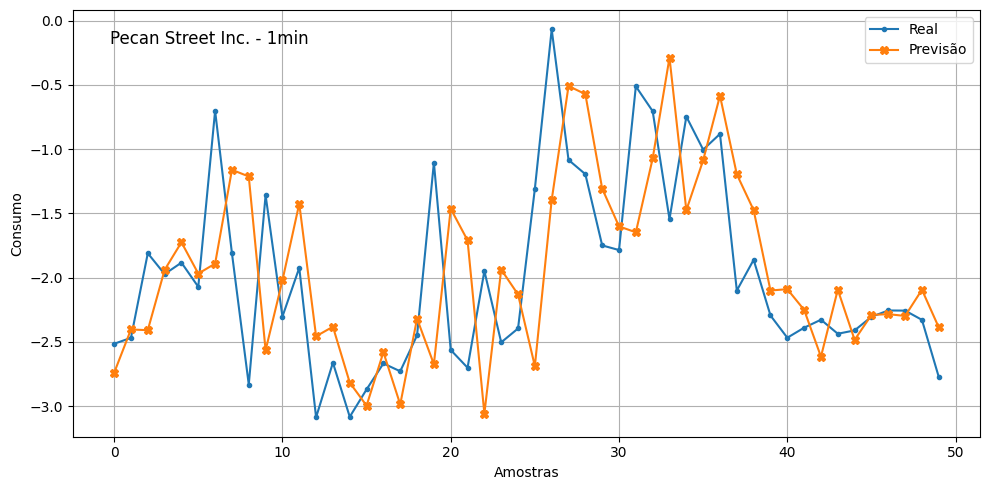

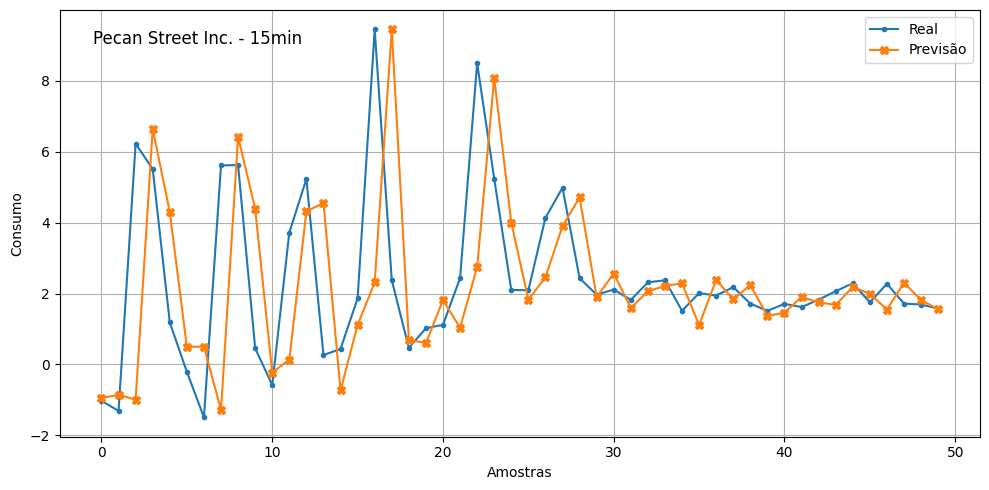

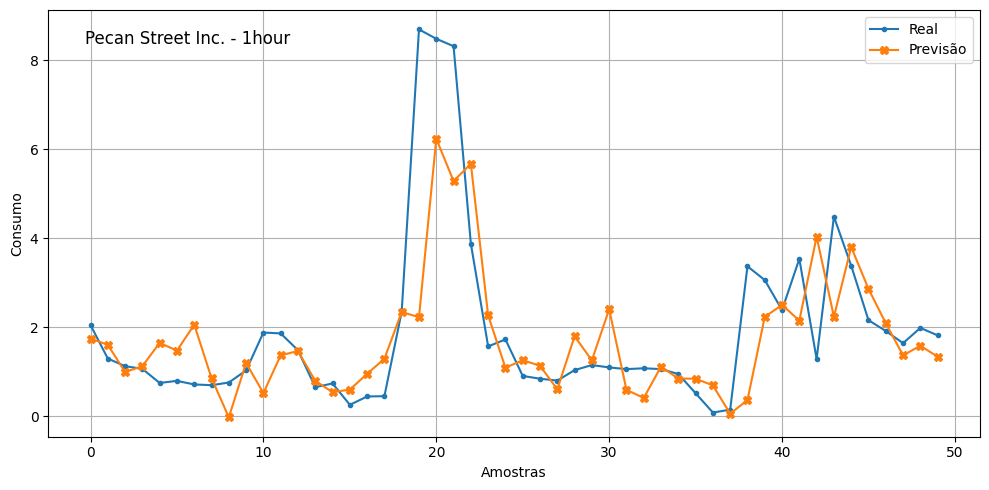

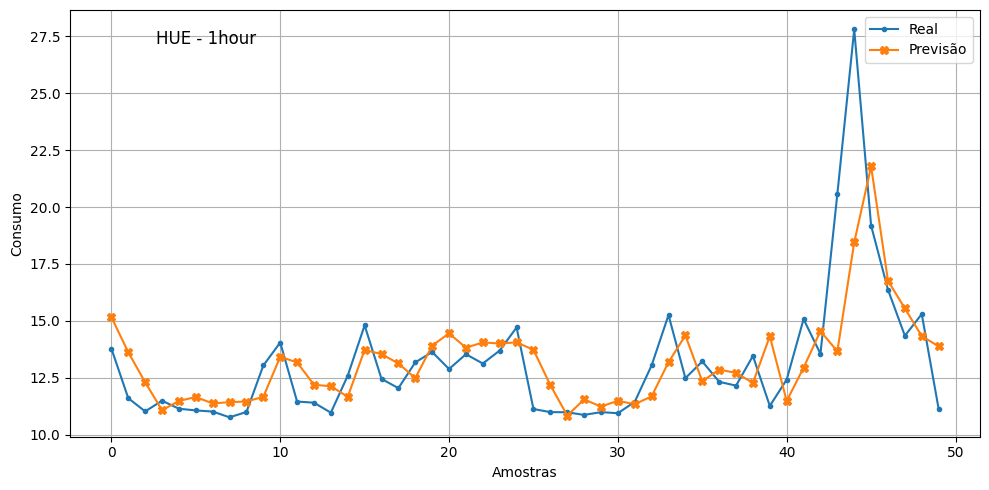

In [19]:
for columns in all_df.columns.to_list():
    _, _, res = columns.partition('- ')
    all_data = all_df[columns].dropna()
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(0, 50), all_data['label'][-50:], marker='.', label='Real')
    plt.plot(np.arange(0, 50), all_data['out'][-50:], marker='X', label='Previsão',
                  c='#ff7f0e')
    plt.title(columns, x=0.15, y=0.90)
    plt.ylabel('Consumo')

    plt.xlabel('Amostras')
    plt.savefig(f'{overleaf_project_path}/predictions/SARIMAX/SARIMAX_{res}_preds.pdf', dpi=200, bbox_inches='tight')
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()
    


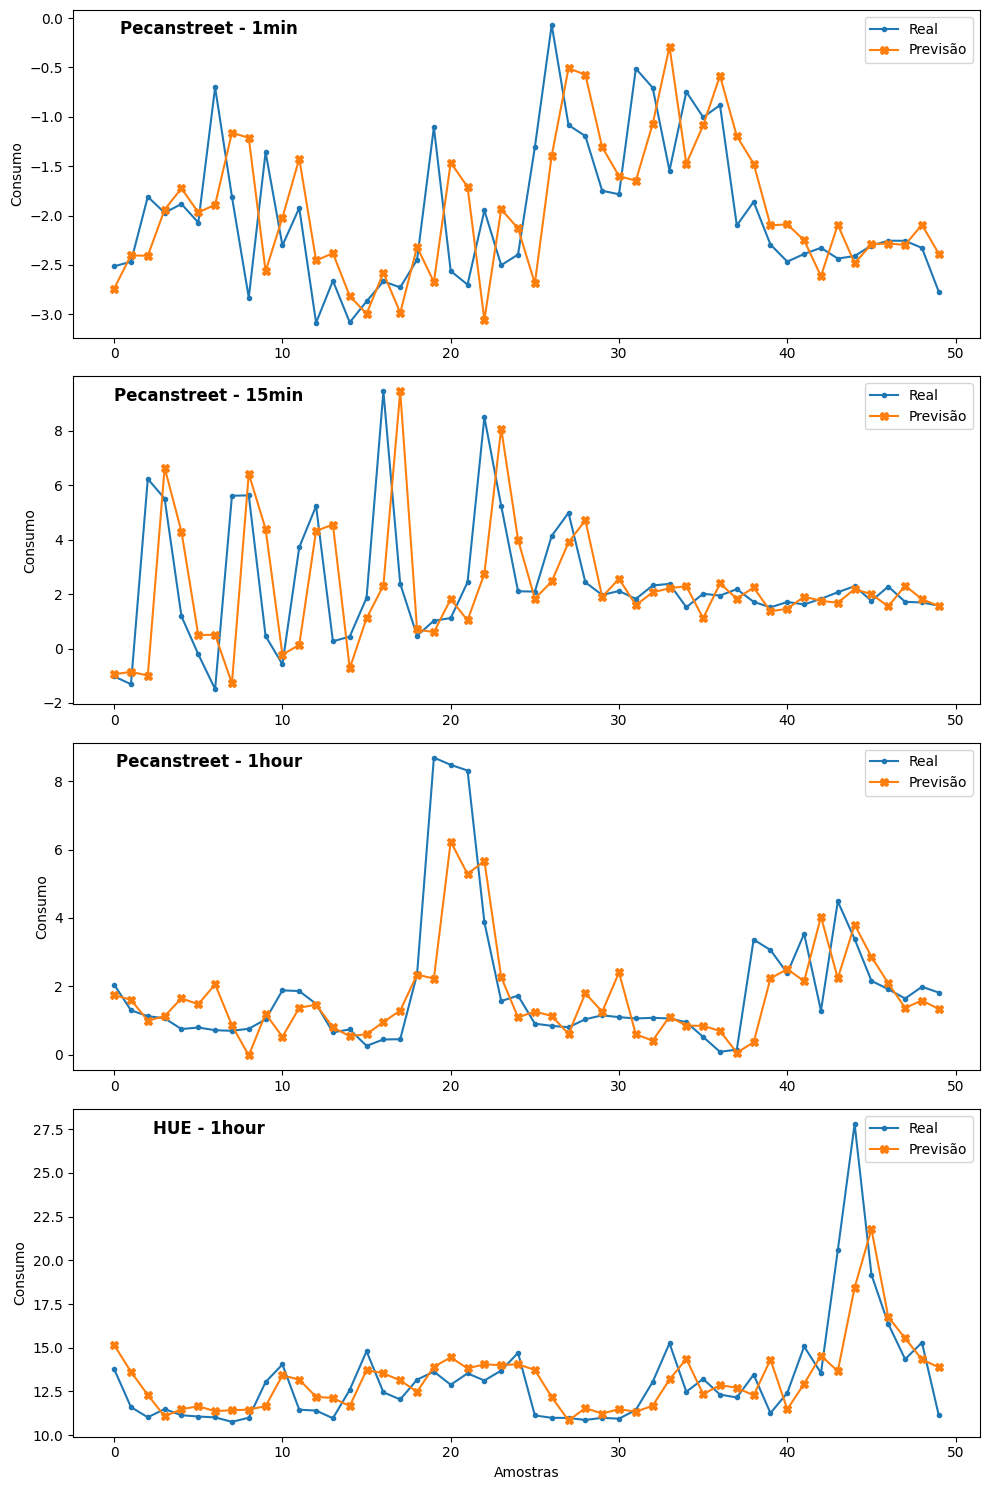

In [11]:
f, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))
for i, ax in enumerate(axs.flat):
    all_data = all_df.iloc[:,i]
    pca_data = pca_df.iloc[:,i]
    all_data.dropna(inplace=True)
    pca_data.dropna(inplace=True)
    ax.plot(np.arange(0, 50), all_data['label'][-50:], marker='.', label='Real')
    ax.plot(np.arange(0, 50), all_data['out'][-50:], marker='X', label='Previsão',
                  c='#ff7f0e')
    ax.set_title(all_df.columns[i], fontweight='bold', x=0.15, y=0.90)
    ax.set_ylabel('Consumo')
    ax.legend()
plt.xlabel('Amostras')
plt.tight_layout()
# plt.savefig(f'{overleaf_project_path}/predictions/SARIMAX/SARIMAX_preds.pdf', dpi=200, bbox_inches='tight')
plt.show()
